### Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Importing the Crime Data

In [2]:
data = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

### Settings

In [3]:
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 35)

### Check the Dataset

In [4]:
data.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4018830907041,40188309,7041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.500000,90.000000,POINT (-120.50000000000001 90),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13605159706372,136051597,6372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,1300 Block of STEVENSON ST,-122.421595,37.770767,POINT (-122.421594519119 37.7707674171464),32.0,1.0,10.0,20.0,8.0,2.0,9.0,28853.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
2,13618826906244,136188269,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,VALENCIA ST / DUBOCE AV,-122.422367,37.769868,POINT (-122.422367409563 37.7698682392455),NaN,3.0,5.0,20.0,8.0,4.0,5.0,28853.0,19.0,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN
3,4098938926105,40989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,300 Block of WOODSIDE AV,-122.452717,37.745745,POINT (-122.452716700987 37.7457451434135),49.0,7.0,8.0,38.0,1.0,5.0,4.0,59.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0
4,5085058207021,50850582,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,0 Block of RAE AV,-122.448127,37.712164,POINT (-122.448127287476 37.7121636146229),66.0,9.0,1.0,28.0,9.0,7.0,6.0,28861.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,66.0


In [5]:
data.columns

Index(['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript',
       'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2',
       

### Number of Crimes per Weekday

In [6]:
num_cri_weekday = data['DayOfWeek'].value_counts()
print(num_cri_weekday)

Friday       328671
Wednesday    315954
Saturday     313565
Thursday     308132
Tuesday      306896
Monday       298871
Sunday       288864
Name: DayOfWeek, dtype: int64


### Creating Year Column

In [7]:
data['Year'] = data['Date'].str.strip().str[-4:]

### Filtering the Period

In [8]:
data = data[data["Year"].isin(['2013', '2014', '2015','2016','2017','2018'])]

### Focus Crimes

In [9]:
focus_crimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
focus_data = data[['Category', 'Year', 'DayOfWeek']].copy()
focus_data = focus_data[focus_data['Category'].isin(focus_crimes)].reset_index(drop=True)

### 14 Focus Crimes Pivot Table (Weekdays)

In [10]:
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
pivot1 = pd.pivot_table(focus_data, index = "Category", columns = "DayOfWeek",values = 'Year' ,aggfunc = 'count')
pivot1 = pivot1[days]
display(pivot1)

DayOfWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Category,,,,,,,
ASSAULT,9345,9154,9308,9276,10157,11030,10822
BURGLARY,4532,4550,4708,4652,5238,4232,3899
DISORDERLY CONDUCT,366,418,436,348,282,334,311
DRIVING UNDER THE INFLUENCE,241,185,214,227,325,436,394
DRUG/NARCOTIC,3597,3907,4115,3900,3467,3062,3094
DRUNKENNESS,380,361,352,376,454,531,576
LARCENY/THEFT,29291,29263,30192,30302,34432,34276,29989
PROSTITUTION,240,337,330,860,567,234,135
ROBBERY,2590,2516,2575,2517,2641,2901,2910


### 14 Focus Crimes Bar Plots (Weekdays)

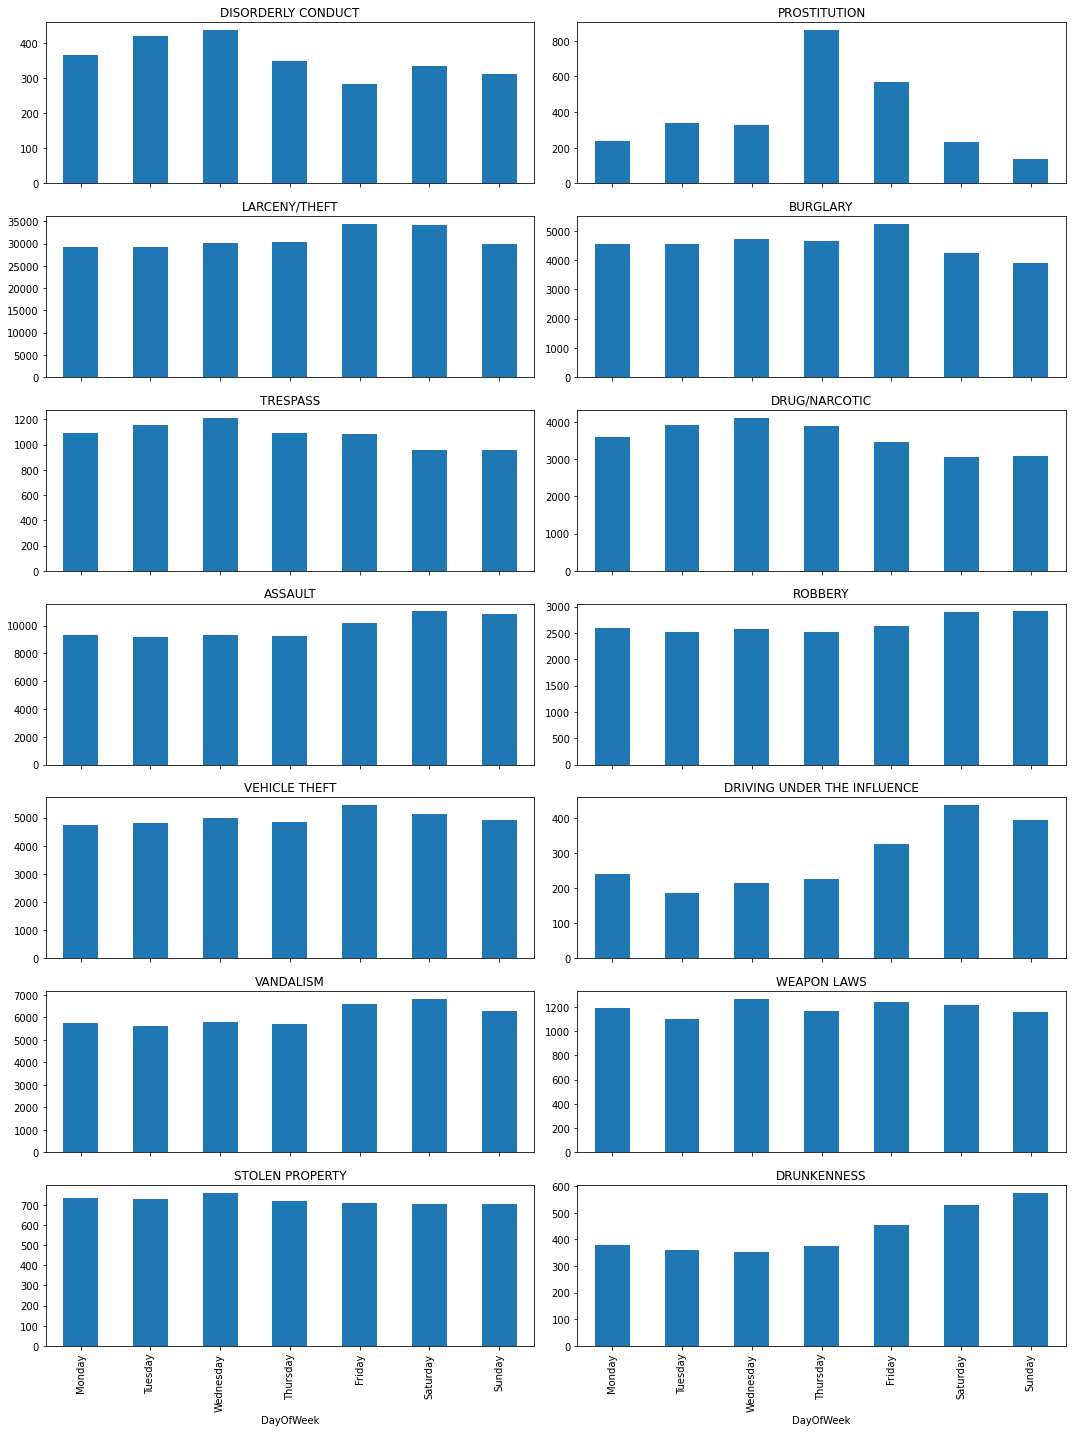

In [11]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,20), sharex=True)
col = ['DayOfWeek', 'Occurences']

for i, crime in enumerate(focus_crimes):
    crime_data = pivot1.loc[crime]
    crime_dataframe = pd.DataFrame(crime_data.reset_index())
    crime_dataframe.columns = col
    crime_dataframe.plot(kind='bar', x='DayOfWeek', y='Occurences', title=crime, ax=axes[i//2,i%2], legend=False)

fig.tight_layout()

### Creating Month Column

In [12]:
data['Month'] = data['Date'].str.strip().str[0:2]

data['Month'] = data['Month'].str.replace('01', 'January')
data['Month'] = data['Month'].str.replace('02', 'February')
data['Month'] = data['Month'].str.replace('03', 'March')
data['Month'] = data['Month'].str.replace('04', 'April')
data['Month'] = data['Month'].str.replace('05', 'May')
data['Month'] = data['Month'].str.replace('06', 'June')
data['Month'] = data['Month'].str.replace('07', 'July')
data['Month'] = data['Month'].str.replace('08', 'August')
data['Month'] = data['Month'].str.replace('09', 'September')
data['Month'] = data['Month'].str.replace('10', 'October')
data['Month'] = data['Month'].str.replace('11', 'November')
data['Month'] = data['Month'].str.replace('12', 'December')

### Focus Crime

In [13]:
focus_data = data[['Category', 'Year', 'Month']].copy()
focus_data = focus_data[focus_data['Category'].isin(focus_crimes)].reset_index(drop=True)

### Number of Crimes per Months

In [14]:
num_cri_months = data['Month'].value_counts()
print(num_cri_months)

January      75860
March        75054
April        71826
February     68377
May          67159
October      65790
August       65027
July         63333
September    63118
June         61201
November     60349
December     59351
Name: Month, dtype: int64


### 14 Focus Crimes Pivot Table (Months)

In [15]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot2 = pd.pivot_table(focus_data, index = "Category", columns = "Month",values = 'Year' ,aggfunc = 'count')
pivot2 = pivot2[months]
display(pivot2)

Month,January,February,March,April,May,June,July,August,September,October,November,December
Category,,,,,,,,,,,,
ASSAULT,6401,5848,6642,6354,5857,5427,5318,5705,5692,5649,5181,5018
BURGLARY,3165,2856,3164,2908,2655,2245,2442,2409,2488,2488,2364,2627
DISORDERLY CONDUCT,236,209,227,184,215,191,200,206,203,213,234,177
DRIVING UNDER THE INFLUENCE,172,186,207,184,177,145,153,172,179,162,147,138
DRUG/NARCOTIC,2584,2371,2640,2428,2249,1752,1832,2023,1903,1975,1822,1563
DRUNKENNESS,255,245,285,254,272,247,235,285,257,264,203,228
LARCENY/THEFT,20675,18194,19573,18914,17672,16627,17922,17938,17396,18450,17118,17266
PROSTITUTION,309,277,210,277,221,218,159,156,201,216,244,215
ROBBERY,1780,1639,1604,1645,1574,1539,1515,1533,1474,1651,1285,1411


### 14 Focus Crimes Bar Plots (Months)

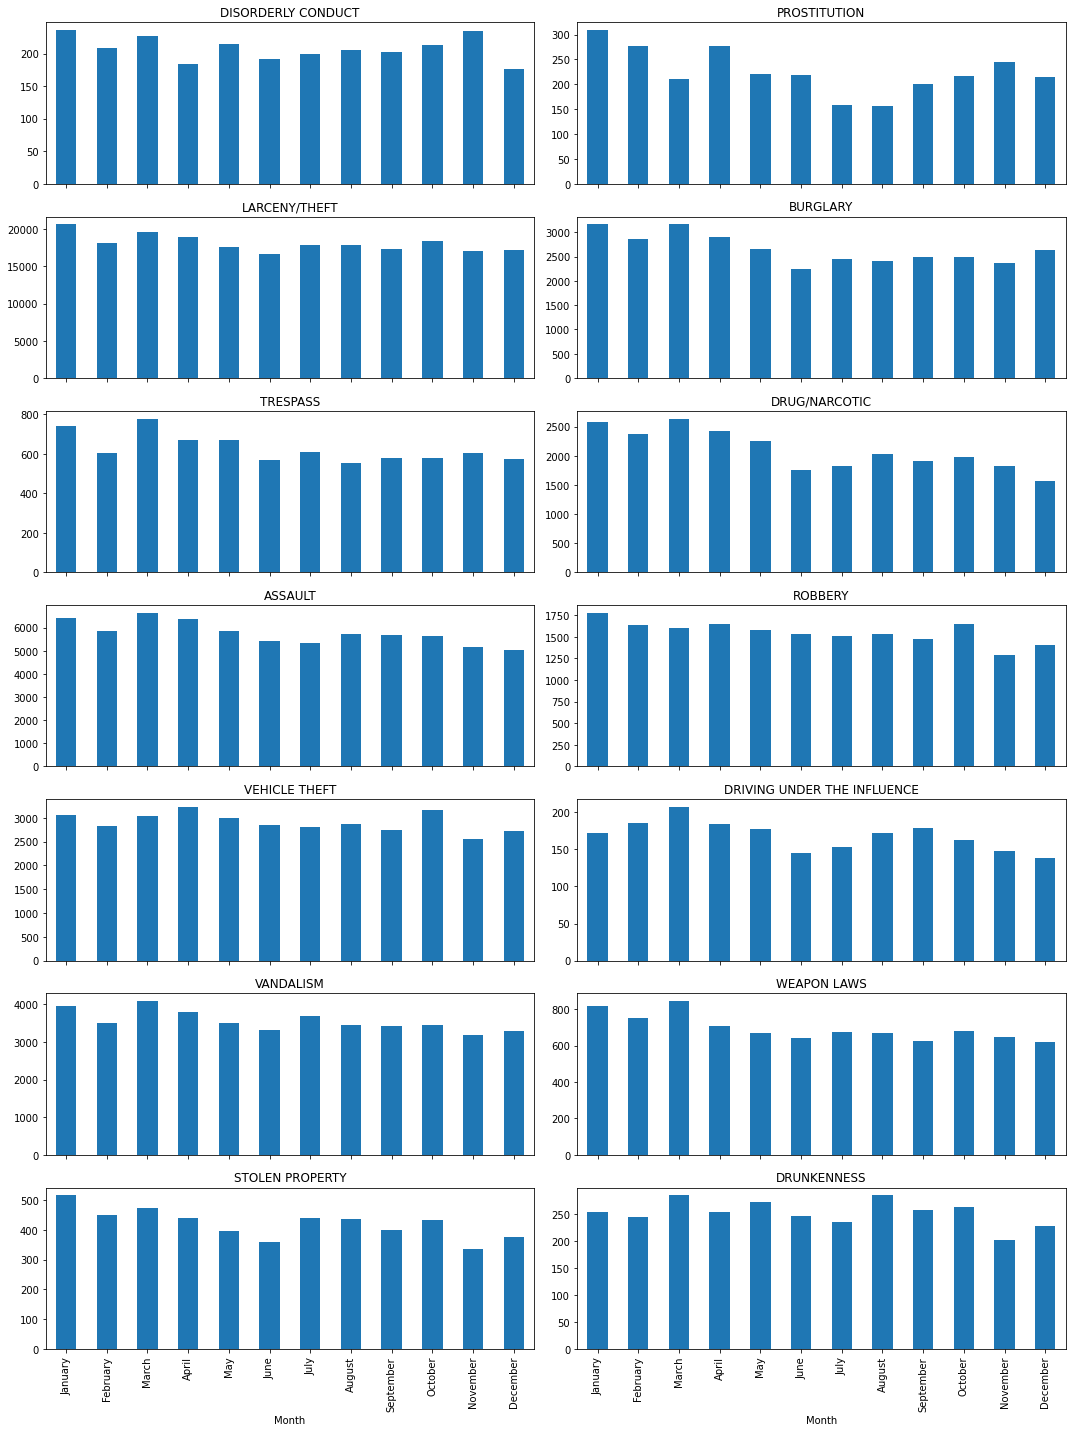

In [16]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,20), sharex=True)
col = ['Month', 'Occurences']

for i, crime in enumerate(focus_crimes):
    crime_data = pivot2.loc[crime]
    crime_dataframe = pd.DataFrame(crime_data.reset_index())
    crime_dataframe.columns = col
    crime_dataframe.plot(kind='bar', x='Month', y='Occurences', title=crime, ax=axes[i//2,i%2], legend=False)

fig.tight_layout()

### Creating the Hour Column

In [17]:
data['Hour'] = data['Time'].str.strip().str[0:2]

data['Hour'] = data['Hour'].str.replace('00', 'Midnight - 1am')
data['Hour'] = data['Hour'].str.replace('01', '1am - 2am')
data['Hour'] = data['Hour'].str.replace('02', '2am - 3am')
data['Hour'] = data['Hour'].str.replace('03', '3am - 4am')
data['Hour'] = data['Hour'].str.replace('04', '4am - 5am')
data['Hour'] = data['Hour'].str.replace('05', '5am - 6am')
data['Hour'] = data['Hour'].str.replace('06', '6am - 7am')
data['Hour'] = data['Hour'].str.replace('07', '7am - 8am')
data['Hour'] = data['Hour'].str.replace('08', '8am - 9am')
data['Hour'] = data['Hour'].str.replace('09', '%temp1%').replace('10', '%temp2%').replace('11', '11am - Noon').replace('%temp2%', '10am - 11am').replace('%temp1%', '9am - 10am')
#data['Hour'] = data['Hour'].str.replace('09', '9am - 10am')
#data['Hour'] = data['Hour'].str.replace('10', '10am - 11am')
#data['Hour'] = data['Hour'].str.replace('11', '11am - Noon')
data['Hour'] = data['Hour'].str.replace('12', 'Noon - 1pm')
data['Hour'] = data['Hour'].str.replace('13', '1pm - 2pm')
data['Hour'] = data['Hour'].str.replace('14', '2pm - 3pm')
data['Hour'] = data['Hour'].str.replace('15', '3pm - 4pm')
data['Hour'] = data['Hour'].str.replace('16', '4pm - 5pm')
data['Hour'] = data['Hour'].str.replace('17', '5pm - 6pm')
data['Hour'] = data['Hour'].str.replace('18', '6pm - 7pm')
data['Hour'] = data['Hour'].str.replace('19', '7pm - 8pm')
data['Hour'] = data['Hour'].str.replace('20', '8pm - 9pm')
data['Hour'] = data['Hour'].str.replace('21', '9pm - 10pm')
data['Hour'] = data['Hour'].str.replace('22', '10pm - 11pm')
data['Hour'] = data['Hour'].str.replace('23', '11pm - Midnight')

### Focus Crimes

In [18]:
focus_data = data[['Category', 'Year', 'Hour']].copy()
focus_data = focus_data[focus_data['Category'].isin(focus_crimes)].reset_index(drop=True)

### Number of Crimes per Hour

In [19]:
num_cri_hour = data['Hour'].value_counts()
print(num_cri_hour)

6pm - 7pm          52412
5pm - 6pm          49062
7pm - 8pm          48236
Noon - 1pm         48024
4pm - 5pm          44882
8pm - 9pm          43698
3pm - 4pm          42619
9pm - 10pm         40003
10pm - 11pm        39979
Midnight - 1am     39470
2pm - 3pm          39309
1pm - 2pm          38702
11pm - Midnight    35777
11am - Noon        35415
10am - 11am        33777
9am - 10am         31115
8am - 9am          27830
1am - 2am          23394
7am - 8am          19428
2am - 3am          18988
3am - 4am          13488
6am - 7am          12273
4am - 5am           9705
5am - 6am           8859
Name: Hour, dtype: int64


### 14 Focus Crimes Pivot Table (Hours)

In [20]:
hours = ['Midnight - 1am', '1am - 2am', '2am - 3am', '3am - 4am', '4am - 5am', '5am - 6am', '6am - 7am', '7am - 8am', '8am - 9am', '9am - 10am', '10am - 11am', '11am - Noon', 'Noon - 1pm', '1pm - 2pm', '2pm - 3pm', '3pm - 4pm', '4pm - 5pm', '5pm - 6pm', '6pm - 7pm', '7pm - 8pm', '8pm - 9pm', '9pm - 10pm', '10pm - 11pm', '11pm - Midnight']
pivot3 = pd.pivot_table(focus_data, index = "Category", columns = "Hour",values = 'Year' ,aggfunc = 'count')
pivot3 = pivot3[hours]
display(pivot3)

Hour,Midnight - 1am,1am - 2am,2am - 3am,3am - 4am,4am - 5am,5am - 6am,6am - 7am,7am - 8am,8am - 9am,9am - 10am,10am - 11am,11am - Noon,Noon - 1pm,1pm - 2pm,2pm - 3pm,3pm - 4pm,4pm - 5pm,5pm - 6pm,6pm - 7pm,7pm - 8pm,8pm - 9pm,9pm - 10pm,10pm - 11pm,11pm - Midnight
Category,,,,,,,,,,,,,,,,,,,,,,,,
ASSAULT,3691,3139,2794,1570,992,918,1153,1673,2278,2516,2779,2938,3617,3103,3152,3545,3674,3821,3675,3649,3623,3855,3589,3348
BURGLARY,1376,941,1103,1182,1053,942,756,934,1376,1324,1217,1153,1540,1037,1143,1342,1619,2073,2134,1745,1538,1513,1450,1320
DISORDERLY CONDUCT,137,89,81,41,32,93,212,279,240,170,129,95,68,71,75,84,74,61,85,63,66,66,96,88
DRIVING UNDER THE INFLUENCE,240,208,198,102,36,26,29,19,17,31,14,20,22,26,33,42,77,73,62,90,110,133,181,233
DRUG/NARCOTIC,932,565,474,364,251,158,361,766,923,1039,995,1195,1441,1640,1566,1763,1918,1963,1624,1379,925,789,1128,983
DRUNKENNESS,227,220,197,77,41,17,30,72,69,85,84,107,108,92,102,124,128,140,172,141,163,182,225,227
LARCENY/THEFT,8073,5363,3268,2179,1439,1498,2237,3228,5515,7094,9302,10423,12130,11088,11267,11699,12533,14446,18250,17566,15594,12582,11290,9681
PROSTITUTION,291,184,149,80,31,20,4,5,10,6,15,54,189,43,102,122,124,124,128,210,176,161,226,249
ROBBERY,1015,1085,1110,692,446,381,336,329,367,426,510,571,698,719,751,776,865,860,949,1001,1124,1231,1225,1183


### 14 Focus Crimes Bar Plots (Hours)

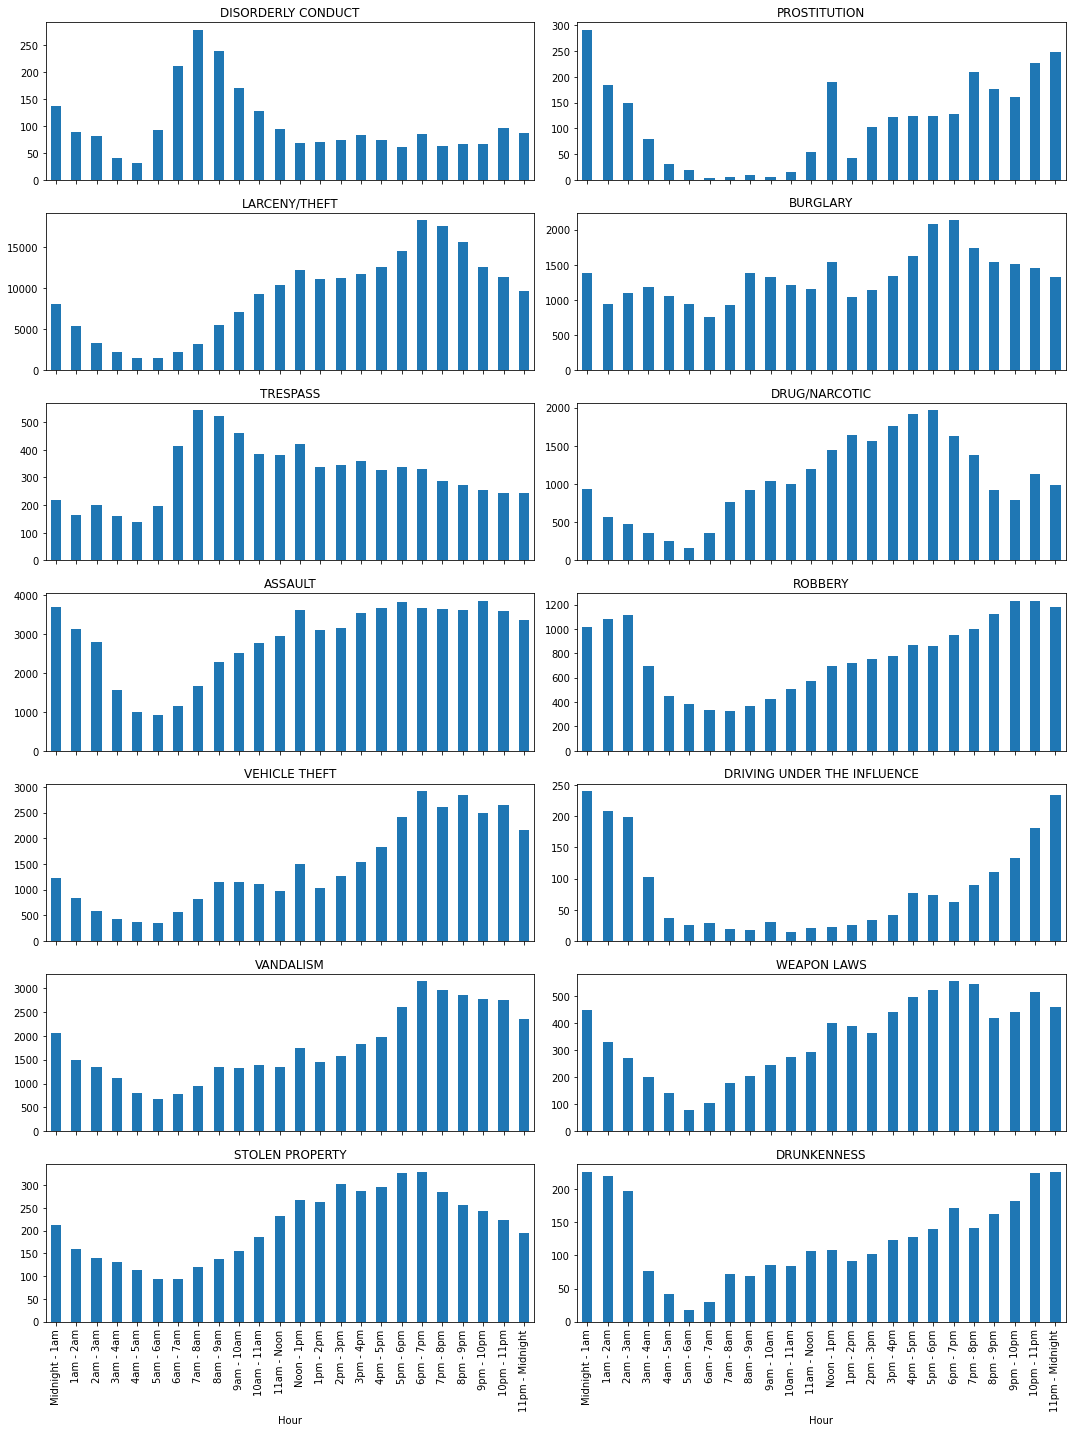

In [21]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,20), sharex=True)
col = ['Hour', 'Occurences']

for i, crime in enumerate(focus_crimes):
    crime_data = pivot3.loc[crime]
    crime_dataframe = pd.DataFrame(crime_data.reset_index())
    crime_dataframe.columns = col
    crime_dataframe.plot(kind='bar', x='Hour', y='Occurences', title=crime, ax=axes[i//2,i%2], legend=False)

fig.tight_layout()

### Creating the Weekhour Column

In [22]:
data['int_hour'] = pd.to_datetime(data['Time'], format = '%H:%M').dt.hour
data['int_day'] = data['DayOfWeek'].str.replace('Monday', '0').replace('Tuesday', '24').replace('Wednesday', '48').str.replace('Thursday', '72').str.replace('Friday', '96').str.replace('Saturday', '120').str.replace('Sunday', '144')
data['int_day'] = data['int_day'].astype(int)
data['Weekhour'] = data['int_hour'] + data['int_day']

### Focus Crimes

In [23]:
focus_data = data[['Category', 'Year', 'Weekhour']].copy()
focus_data = focus_data[focus_data['Category'].isin(focus_crimes)].reset_index(drop=True)

### 14 Focus Crimes Bar Plots (Weekhours)

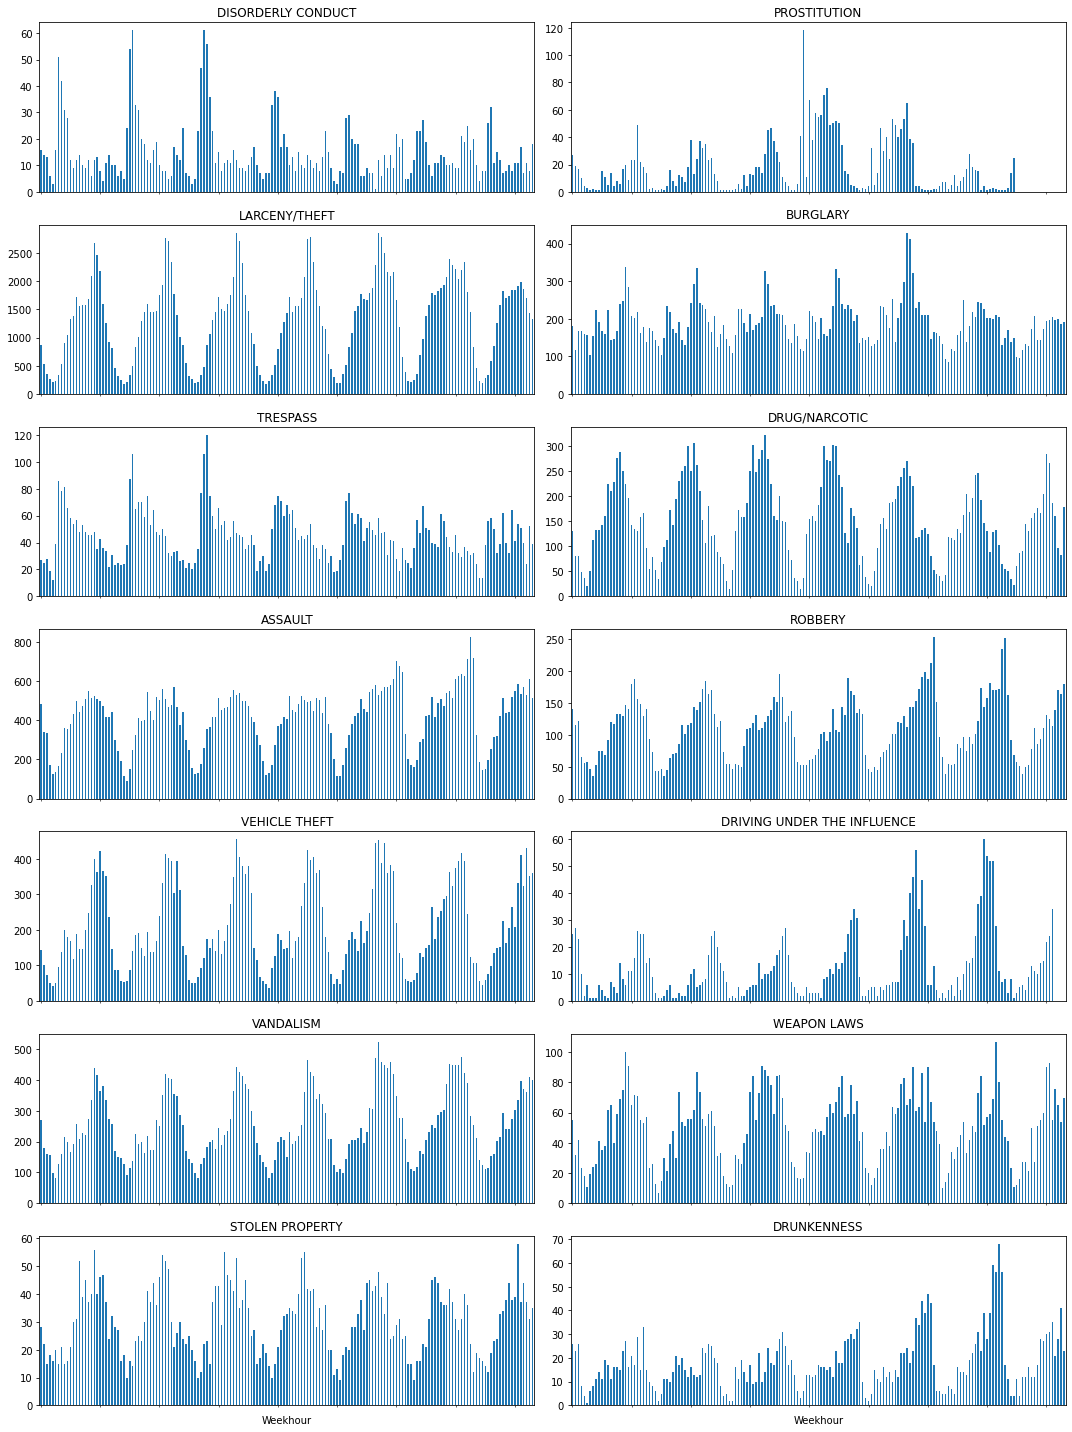

In [24]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,20), sharex=True)

col = ['Weekhour', 'Occurences']

for i, crime in enumerate(focus_crimes):
    crime_data = focus_data[focus_data['Category'] == crime]['Weekhour'].value_counts()
    crime_dataframe = pd.DataFrame(crime_data.reset_index())
    crime_dataframe.columns = col
    crime_dataframe = crime_dataframe.sort_values(by=['Weekhour'])
    
    crime_dataframe.plot(kind='bar', x='Weekhour', y='Occurences', title=crime, ax=axes[i//2,i%2], legend=False)

plt.xticks([]) 

plt.savefig('Weekhours.png')
fig.tight_layout()

### Names of San Francisco's Police Districts

In [25]:
SFPD = list(data['PdDistrict'].unique())
SFPD.pop()
SFPD.sort()

print(SFPD)

['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']


### Police District with Most Crimes

In [26]:
data['PdDistrict'].value_counts()

SOUTHERN      151820
MISSION       105142
NORTHERN      103185
CENTRAL        92634
BAYVIEW        73616
INGLESIDE      64193
TARAVAL        57640
TENDERLOIN     55954
PARK           46636
RICHMOND       45624
Name: PdDistrict, dtype: int64

### Police District with Most Focus Crimes

In [27]:
focus_data = data[['Category', 'Year', 'PdDistrict']].copy()
focus_data = focus_data[focus_data['Category'].isin(focus_crimes)].reset_index(drop=True)
focus_data = focus_data.drop(focus_data[focus_data['Year'] == '2018'].index)

focus_data['PdDistrict'].value_counts()

SOUTHERN      87530
NORTHERN      64189
CENTRAL       56096
MISSION       54723
BAYVIEW       38493
INGLESIDE     33853
TARAVAL       29673
TENDERLOIN    28350
RICHMOND      25451
PARK          24031
Name: PdDistrict, dtype: int64

### P(crime)

In [28]:
total_crimes = len(focus_data)
col = ['Category', 'Occurences']

prob_data = pd.DataFrame(focus_data['Category'].value_counts().reset_index())
prob_data.columns = col

prob_data['Crime Probability'] = prob_data['Occurences']/total_crimes

### P(crime | district)

In [29]:
grouped_data = pd.DataFrame(focus_data.groupby(["PdDistrict", "Category"])["Category"].count())
grouped_data.columns = ['Occurences']

grouped_data['Crime Probability'] = grouped_data/grouped_data.groupby(level=0).sum()

### P(crime | district) / P(crime)

In [30]:
temp_list = []

for i in SFPD:
    temp_category = pd.DataFrame(grouped_data.transpose()[i].iloc[1].reset_index())
    temp = pd.merge(prob_data, temp_category, on="Category")
    temp['Ratio'] = temp['Crime Probability_y'] / temp['Crime Probability_x']
    temp = temp.sort_values(by = 'Category').reset_index(drop=True)
    
    temp_list.extend(list(temp['Ratio']))
    
grouped_data['Ratio'] = temp_list

### 14 Focus Crimes Bar Plots (Ratio)

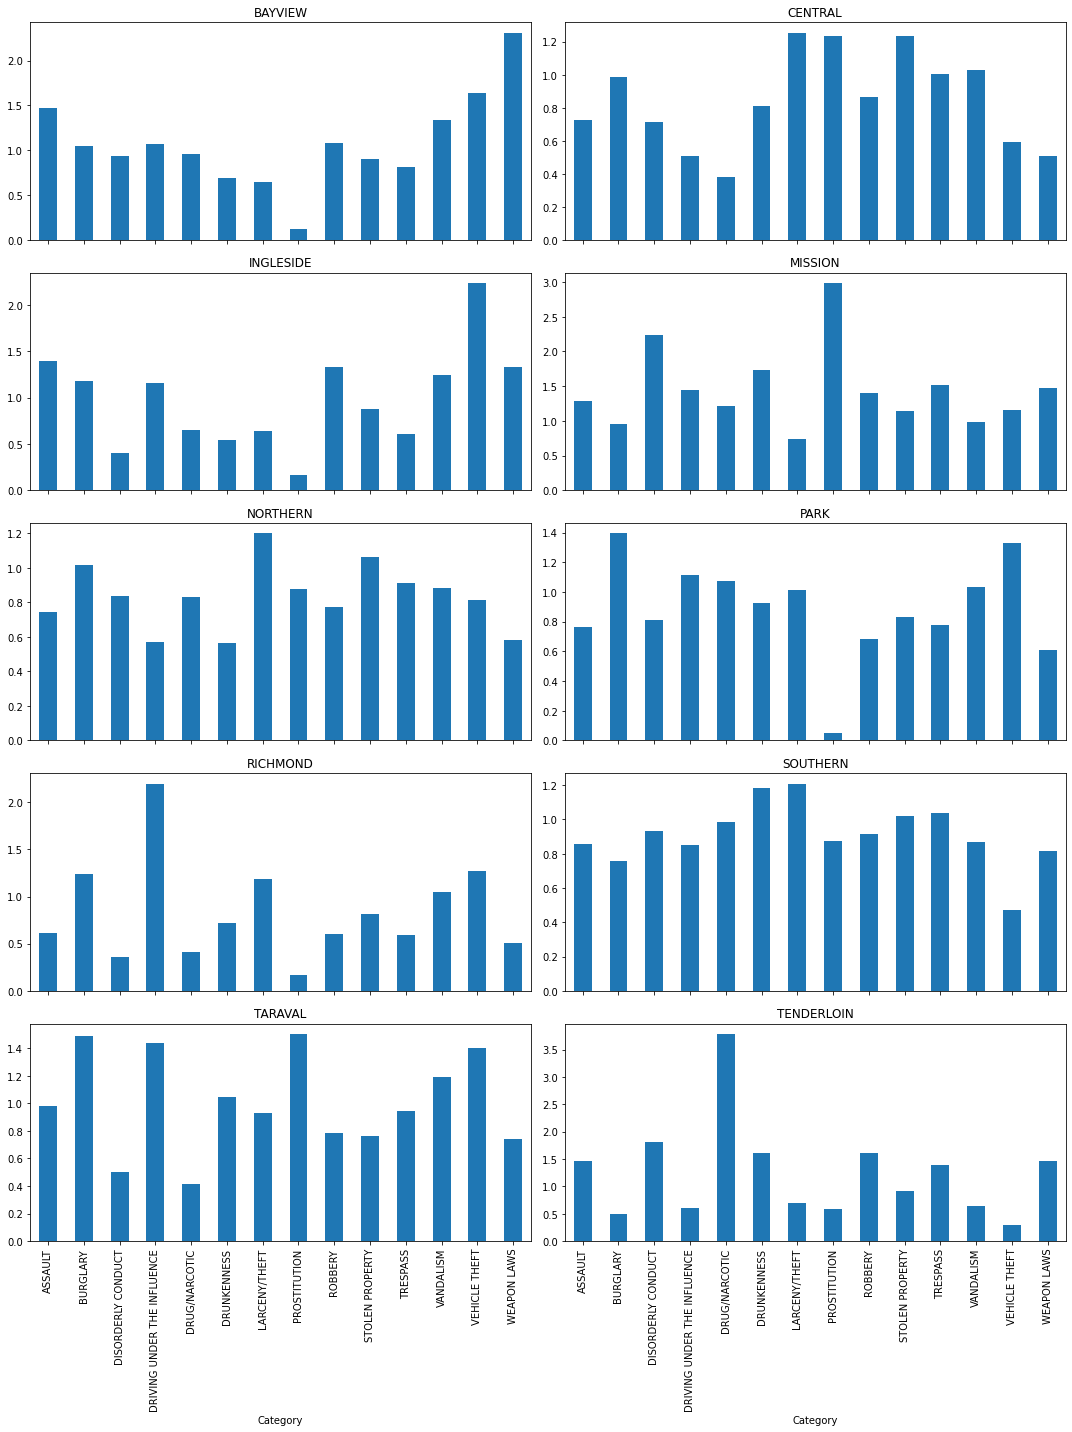

In [31]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,20), sharex=True)

col = ['Category', 'Ratio']

for i, pD in enumerate(SFPD):
    ratio_data = pd.DataFrame(grouped_data.transpose()[pD]).transpose().reset_index()    
    ratio_data.plot(kind='bar', x='Category', y='Ratio', title=pD, ax=axes[i//2,i%2], legend=False)
   
fig.tight_layout()